In [1]:
## Exercise with the wine dataset from sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [11]:
#load the data
wine = load_wine()
print(wine.keys())

data = pd.DataFrame(wine.data, columns=wine.feature_names)


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [12]:
# Create a target column with the dataset target
data['target'] = pd.Series(wine.target)

In [14]:
# print the target_names
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [15]:
# print the first 5 rows of the dataset
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [20]:
#make sure that the columns have the correct label

data.rename(columns={'od280/od315_of_diluted_wines' : 'od_of_diluted_wines'}, inplace=True)
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'od_of_diluted_wines',
       'proline', 'target'],
      dtype='object')

In [17]:
#print the shape of the dataset

data.shape

(178, 14)

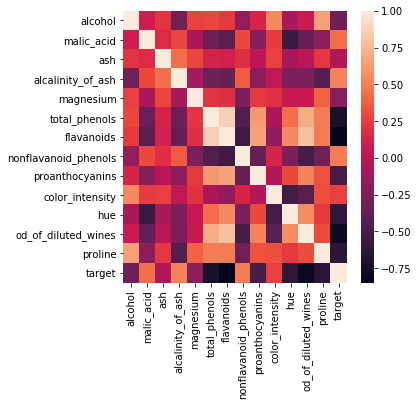

In [21]:
#evaluate features for correlations
plt.figure(figsize=(5,5))
sns.heatmap(data.corr())
plt.show()

In [23]:
#choose features from heat plot
features = ['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue', 'proline', 'od_of_diluted_wines']

In [25]:
#set X to features and y to target

X = data[features]
y = data['target']


In [29]:
#normalize fetures

X = StandardScaler().fit_transform(X)
X[:5]


array([[-1.16959318,  0.80899739,  1.03481896,  0.36217728,  1.01300893,
         1.84791957],
       [-2.49084714,  0.56864766,  0.73362894,  0.40605066,  0.96524152,
         1.1134493 ],
       [-0.2687382 ,  0.80899739,  1.21553297,  0.31830389,  1.39514818,
         0.78858745],
       [-0.80925118,  2.49144552,  1.46652465, -0.42754369,  2.33457383,
         1.18407144],
       [ 0.45194578,  0.80899739,  0.66335127,  0.36217728, -0.03787401,
         0.44960118]])

In [30]:
#split train and test data with 80/20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [49]:
#Now, we classify with a Random forest
rfc = RandomForestClassifier(random_state=99)
rfc.fit(X_train, y_train)
print(rfc.predict(X_test))
print(y_test.values)


[0 0 2 0 1 0 1 2 1 2 0 2 0 2 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]


In [32]:
print('Training Score: {}'.format(rfc.score(X_train, y_train)))
print('Testing Score: {}'.format(rfc.score(X_test, y_test)))

Training Score: 1.0
Testing Score: 0.9722222222222222


## Pretty good, huh? 
- What if we want to use another [classifier from sklearn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)?

In [44]:
########################################################
########################################################
#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [45]:
print('Training Score: {}'.format(knn.score(X_train, y_train)))
print('Testing Score: {}'.format(knn.score(X_test, y_test)))

Training Score: 0.9647887323943662
Testing Score: 0.9444444444444444


In [46]:
########################################################
########################################################
#Support vector machines
svc = SVC(random_state=99)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=99, shrinking=True, tol=0.001,
    verbose=False)

In [52]:
print('Training Score: {}'.format(svc.score(X_train, y_train)))
print('Testing Score: {}'.format(svc.score(X_test, y_test)))

Training Score: 0.9647887323943662
Testing Score: 0.9722222222222222


In [50]:
########################################################
########################################################
#Naive Bayes Guassian
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
print('Training Score: {}'.format(gnb.score(X_train, y_train)))
print('Testing Score: {}'.format(gnb.score(X_test, y_test)))

Training Score: 0.9577464788732394
Testing Score: 0.9444444444444444
